MACHINE EXERCISE NO. 2 Kernel Methods

    Joshua Dela Cruz
    2023-02911



## General Resources

### Libraries

In [1]:
# Data importation and manipulation
import os 
import pandas as pd
import numpy as np

# Model creation, calculation and test
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Data visualization, exploratory and result analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Auxilliaries
from time import time

In [2]:
distribution_line_color = sns.color_palette("dark:green")[2]
train_test_color = sns.color_palette('dark:#5A9_r', n_colors=3)

In [3]:
import warnings

# Suppress 'deprecated' warnings, added in final run to clean notebook when printing into pdf
warnings.filterwarnings("ignore")

### References

     - Problem 1 data source and description: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/data
     - Artwork by @allison_horst
     
     - Problem 2 data source and description: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
     
     - Utilized ChatGPT to incorporate the Multi-Class Classifer into the RandomSearch

## Problem 1: Palmer Penguin Species

    The Palmer dataset is a collection of data on penguin morphology and population, originally published by the British Antarctic Survey. The dataset includes measurements of several physical characteristics of penguins, including culmen length (the length of the upper beak), flipper length, body mass, and sex. It also includes information on the species of penguin and the island where each penguin was observed. The dataset is often used for exploring relationships between different aspects of penguin biology and ecology, and for predicting the species of penguins based on their physical characteristics.
    
    Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.
    - Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081
    
    Simplified data from original penguin data sets. Contains variables:
    species: penguin species (Chinstrap, Adélie, or Gentoo)
    culmen_length_mm: culmen length (mm)
    culmen_depth_mm: culmen depth (mm)
    flipper_length_mm: flipper length (mm)
    body_mass_g: body mass (g)
    island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    sex: penguin sex


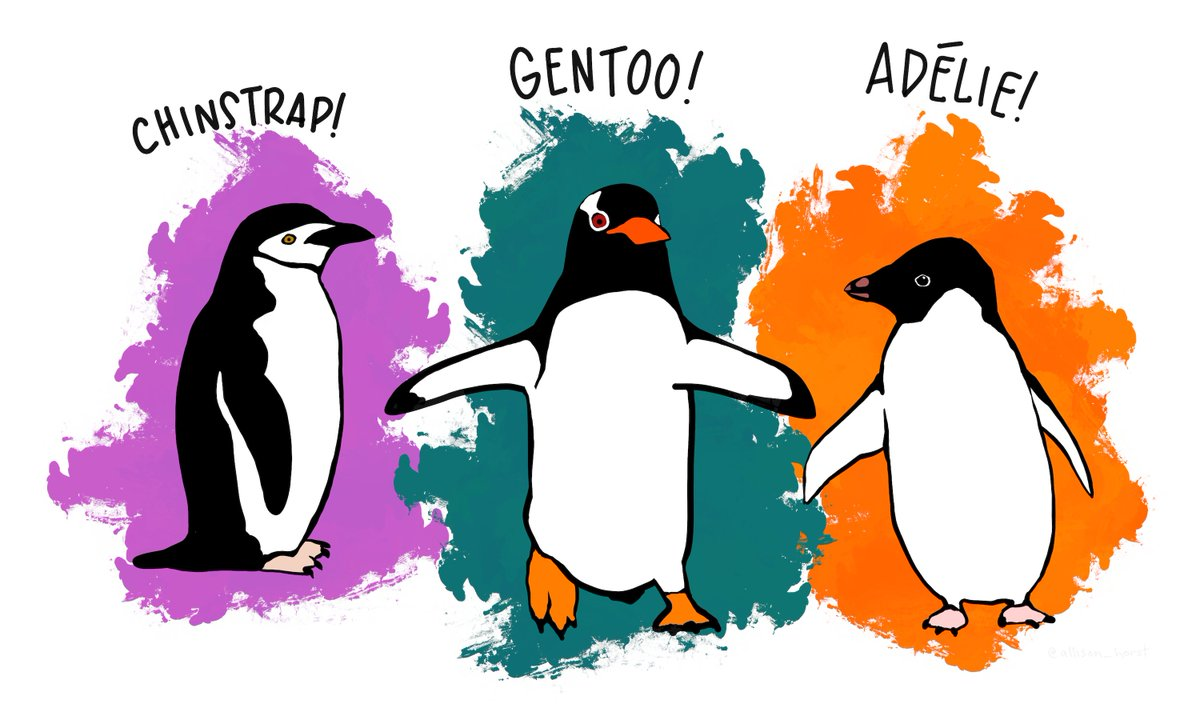

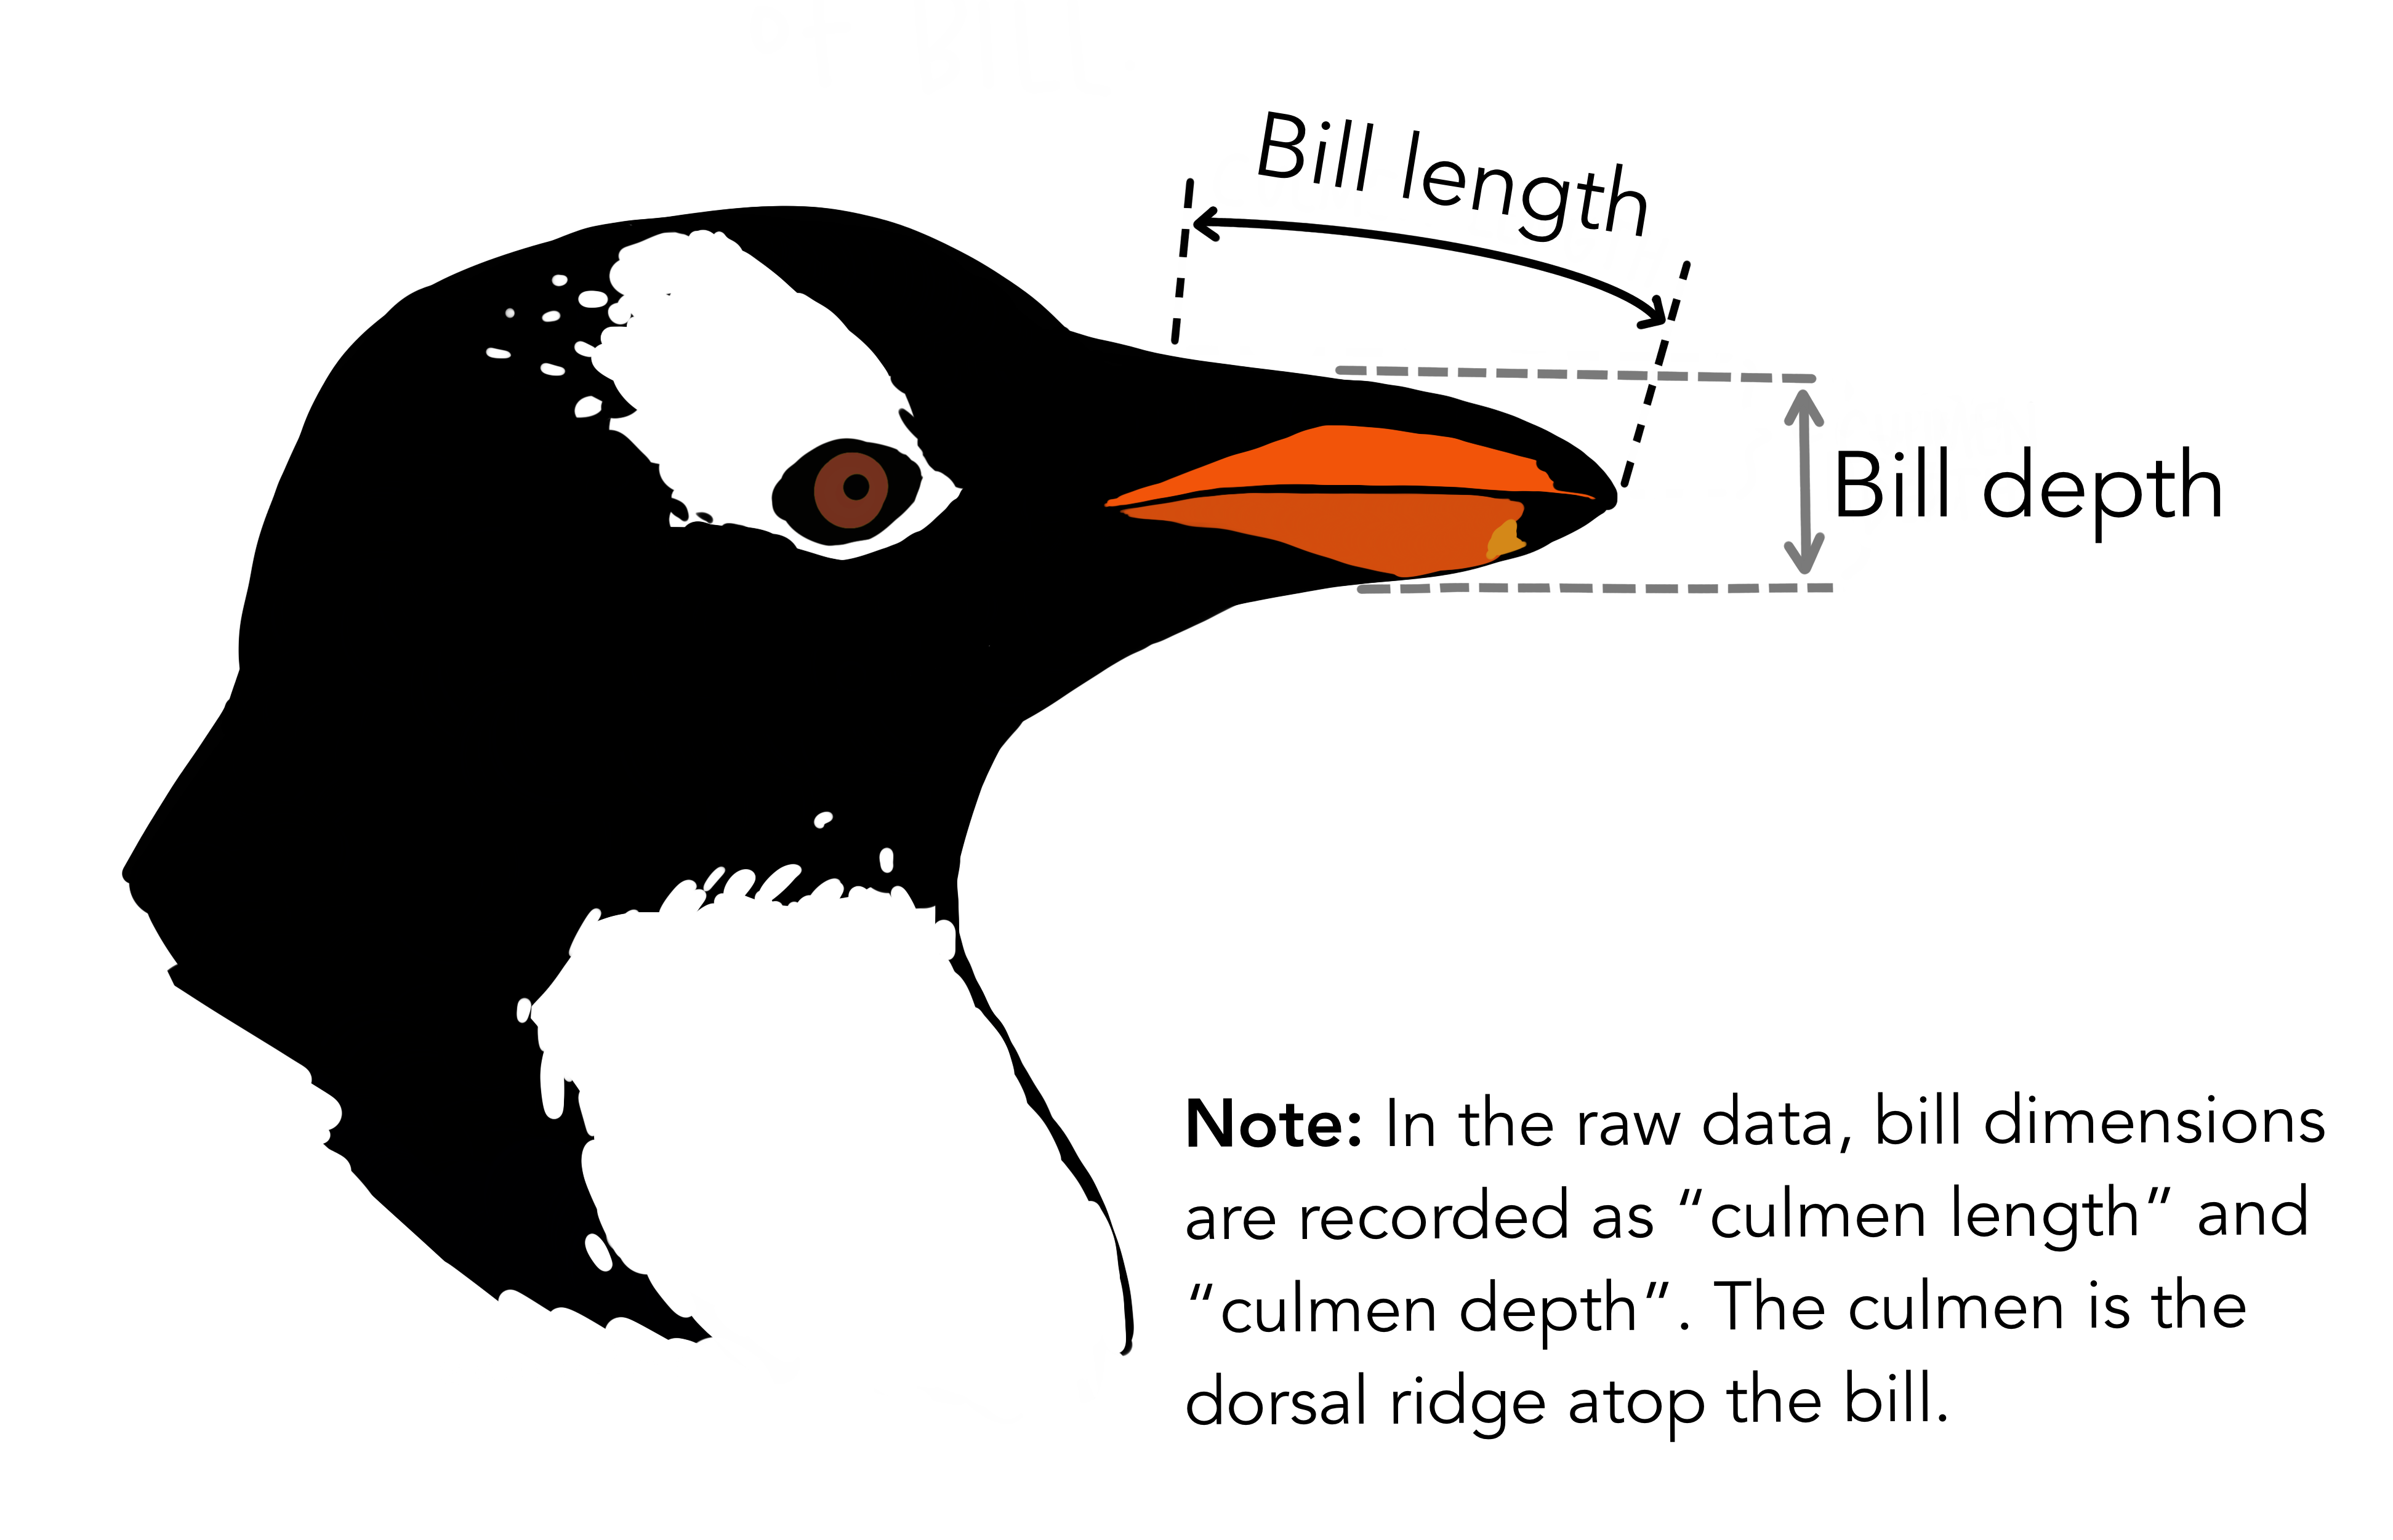

    Main Objective:
    Classify the penguins into their species (Adelie, Chinstrap, and Gentoo) based only on the 
    culmen length and flipper length features. 

### Dataset

#### Import

In [4]:
def import_csv_dataset(file_path):
    df = pd.read_csv(file_path, header=0, encoding='latin-1')
    return df

In [5]:
penguin_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\02 Kernel Methods\penguins_size.csv"
penguin_data_df = import_csv_dataset(penguin_data)

In [6]:
penguin_data_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### Exploratory Analysis

In [7]:
penguin_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
penguin_data_df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
penguin_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


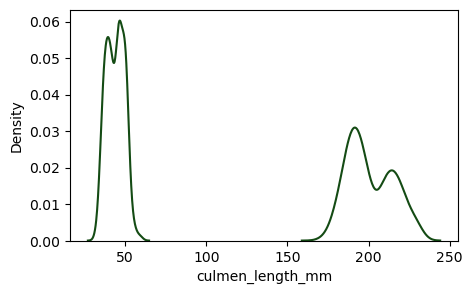

In [10]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['culmen_length_mm'], color=distribution_line_color)
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['flipper_length_mm'], color=distribution_line_color)
plt.show()

#### Visualization

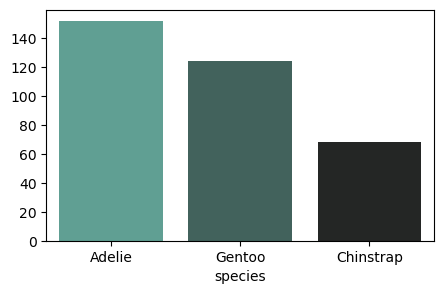

In [11]:
species = penguin_data_df['species'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=species.index, y=species.values, palette='dark:#5A9_r')
plt.show()

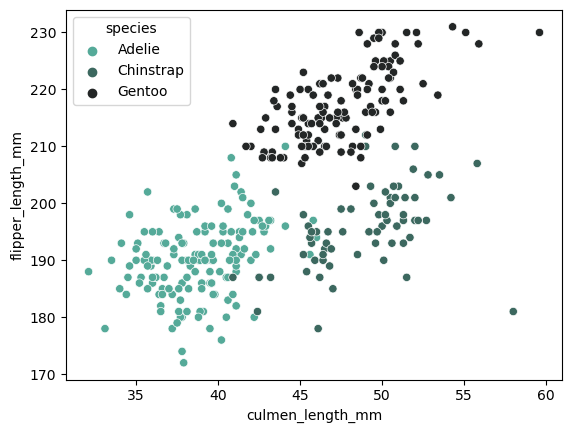

In [12]:
sns.scatterplot(x='culmen_length_mm', y='flipper_length_mm',
                data=penguin_data_df, hue='species', palette='dark:#5A9_r')
plt.show()

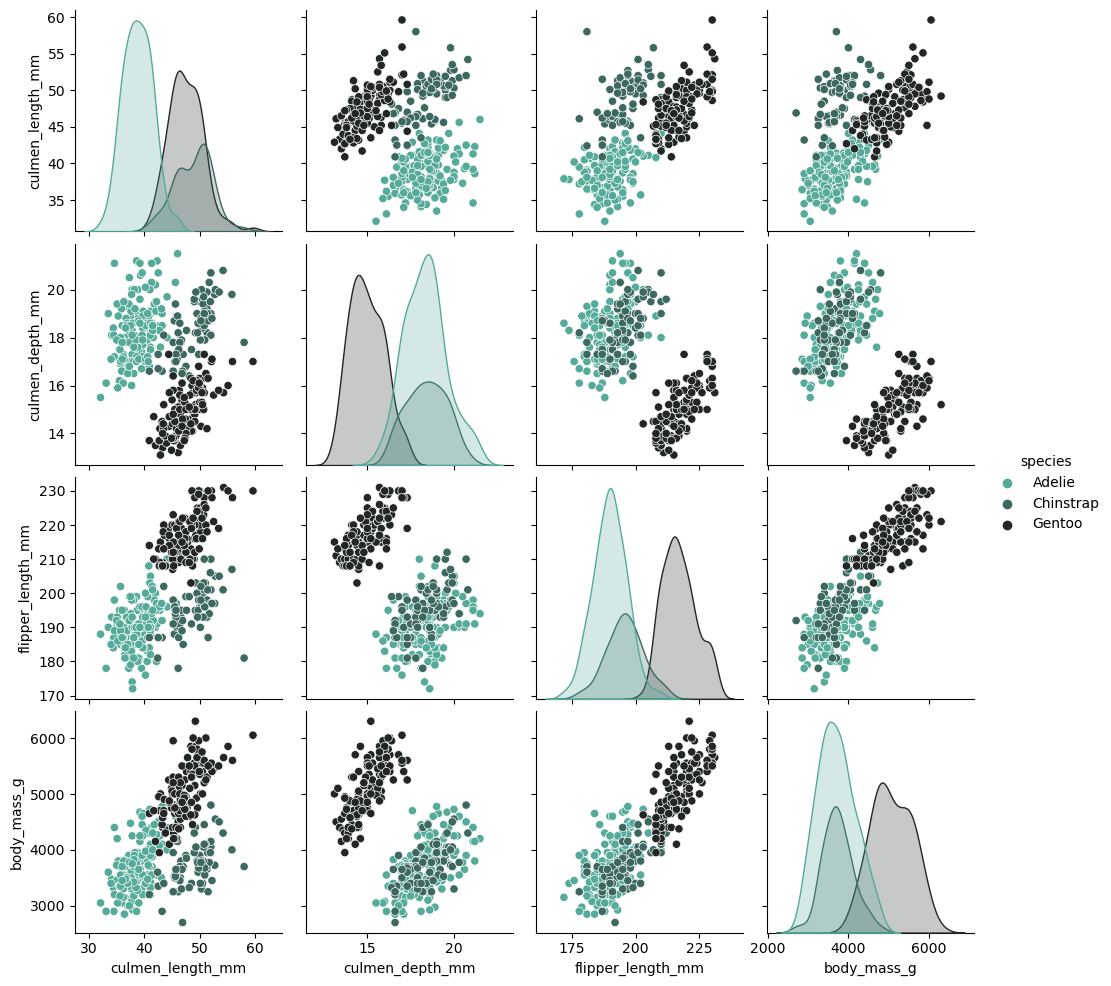

In [13]:
sns.pairplot(penguin_data_df, hue='species', palette='dark:#5A9_r')
plt.show()

EDA INSIGHTS
1. The four main features, culmen length, culmen depth, flipper length and body mass have some missing data.
2. Distribution plot show semi-normal distribution with two peaks of flipper and culmen length.  
3. Scatter plot of culmen and flipper length only show minimal overlap between the different species, highlighting their great separability just with this two features alone.
4. Pair-plot confirms the very high correlation of body mass with flipper length as almost all species data lie within the 45-degree line. This is almost also true with body-mass and culmen length except for the Chinstrap specie. Quite intuitive considering that longer culmen and flipper means that the penguin may be bigger which means more weight (body mass).

#### Preparation

##### Removal or Imputation 

In [14]:
# (a) Test 1 - Drop data with missing values 
penguin_data_df.dropna(inplace=True)

In [ ]:
# (b) Test 2 - Fill missing values with mean
penguin_data_df[['culmen_length_mm']] = penguin_data_df[['culmen_length_mm']].fillna(penguin_data_df[['culmen_length_mm']].mean())
penguin_data_df[['flipper_length_mm']] = penguin_data_df[['flipper_length_mm']].fillna(penguin_data_df[['flipper_length_mm']].mean())

# Just to complete the data
penguin_data_df[['culmen_depth_mm']] = penguin_data_df[['culmen_depth_mm']].fillna(penguin_data_df[['culmen_depth_mm']].mean())
penguin_data_df[['body_mass_g']] = penguin_data_df[['body_mass_g']].fillna(penguin_data_df[['body_mass_g']].mean())

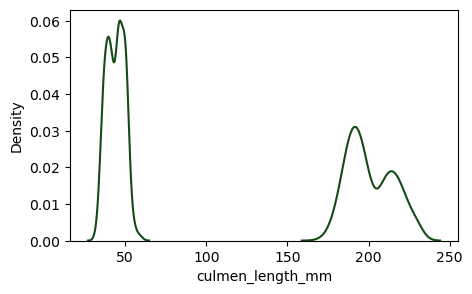

In [15]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['culmen_length_mm'], color=distribution_line_color)
plt.show()

In [ ]:
plt.figure(figsize=(5, 3))
sns.kdeplot(penguin_data_df['flipper_length_mm'], color=distribution_line_color)
plt.show()

    Sidenote:
    Even with the removal of the null data, the distribution curve of the features remained the same!

In [16]:
penguin_data_df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##### Label Setup

In [17]:
species_list = list(set(penguin_data_df['species'].tolist()))
species_list

['Gentoo', 'Chinstrap', 'Adelie']

In [18]:
label_encoder = LabelEncoder()
penguin_data_df['species'] = label_encoder.fit_transform(penguin_data_df['species'])

In [19]:
label_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [20]:
class_mapping = {class_number: class_name for class_number, class_name in enumerate(label_encoder.classes_)}
class_mapping

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

##### Obtain Features and Target

In [21]:
# Extract the attributes and the targets from the dataframe
x = penguin_data_df.iloc[:, [2, 4]].to_numpy()
y = penguin_data_df.iloc[:,0].to_numpy()

In [22]:
print(x.shape)
print(y.shape)

(334, 2)
(334,)


    Split samples into 75% training and 25% test data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=9811, stratify=y)

### (b) Default SVC

#### Fit Training

In [24]:
from sklearn.linear_model import Ridge

In [25]:
default_model = make_pipeline(StandardScaler(), SVC()).fit(x_train, y_train)

In [26]:
def create_confusion_matrix_and_report(model, x, y):
    y_prediction = model.predict(x)
    conf_matrix = confusion_matrix(y, y_prediction)

    conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = class_mapping.values())
    conf_matrix_display.plot(cmap='Greens')

    plt.title('Confusion Matrix')
    plt.show()

    report = classification_report(y, y_prediction, target_names=class_mapping.values())
    print(report)

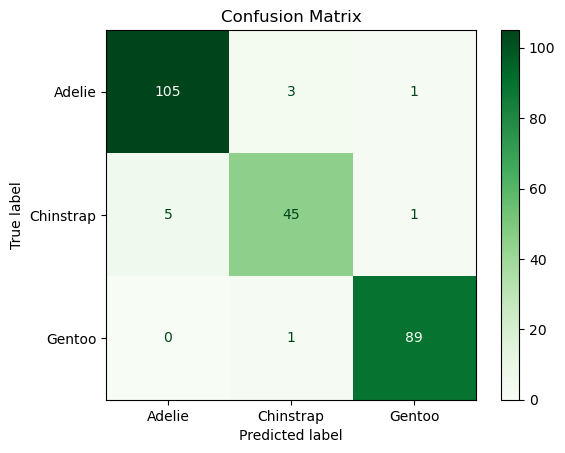

              precision    recall  f1-score   support

      Adelie       0.95      0.96      0.96       109
   Chinstrap       0.92      0.88      0.90        51
      Gentoo       0.98      0.99      0.98        90

    accuracy                           0.96       250
   macro avg       0.95      0.94      0.95       250
weighted avg       0.96      0.96      0.96       250



In [27]:
create_confusion_matrix_and_report(default_model, x_train, y_train)

#### Testing

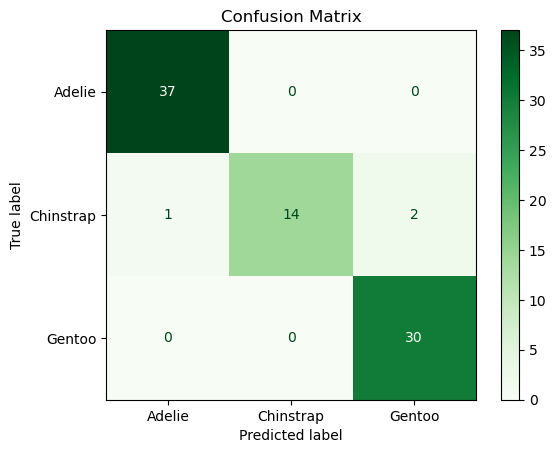

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        37
   Chinstrap       1.00      0.82      0.90        17
      Gentoo       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [28]:
create_confusion_matrix_and_report(default_model, x_test, y_test)

### (c) Initial Decision Boundary

In [29]:
def plot_decision_boundary(model, x_train, y_train, x_test, y_test, target_names):
    
    DecisionBoundaryDisplay.from_estimator(model, x, cmap='Dark2_r', alpha=0.6, eps=0.5)


    for color, i, target_name in zip(train_test_color, [0, 1, 2], class_mapping.values()):
        plt.scatter(x_train[y_train == i, 0], x_train[y_train == i, 1], 
                    color=color, alpha=0.8, lw=2, label=f"{target_name} - train")
        plt.scatter(x_test[y_test == i, 0], x_test[y_test == i, 1], 
                    color=color, alpha=0.8, lw=2, label=f"{target_name} - test", marker='x')

    plt.legend(loc="best", shadow=False)
    plt.title("Train-Test Scatter Plot of Data")
    plt.show()

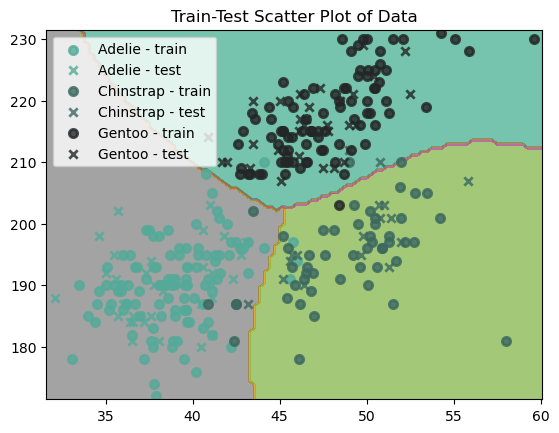

In [30]:
plot_decision_boundary(default_model, x_train, y_train, x_test, y_test, class_mapping.values())

### (d) Model Optimization

In [31]:
best_model = None
best_accuracy = -float('inf')

In [32]:
def model_optimization (classifier, classifier_name, x, y, x_test, y_test, max_iter):
    
    # Parameter Distribution
    param_dist = {
    f'{classifier_name}__estimator__C': stats.expon(scale=100),
    f'{classifier_name}__estimator__gamma': stats.expon(scale=.1),
    f'{classifier_name}__estimator__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
    }

    # Model Pipeline
    if classifier == OutputCodeClassifier:
        model = make_pipeline(StandardScaler(), classifier(SVC(), code_size=3))
    else:
        model = make_pipeline(StandardScaler(), classifier(SVC()))
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0)
    start = time()
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))
    
    # Best Parameter
    print('Best Parameters:\n', random_search.best_params_)
    
    # Search Result
    predictions = random_search.best_estimator_.predict(x_test)
    print(classification_report(y_test, predictions))
    
    return random_search.best_estimator_, accuracy_score(y_test, predictions) 

#### OneVsOne SVC Classifier

In [33]:
ovo_model, ovo_accuracy = model_optimization (OneVsOneClassifier, 'onevsoneclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.27 seconds for 5 candidates parameter settings.
Best Parameters:
 {'onevsoneclassifier__estimator__C': 355.9399779574707, 'onevsoneclassifier__estimator__gamma': 0.056301650379847114, 'onevsoneclassifier__estimator__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.82      0.90        17
           2       0.94      1.00      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [34]:
if ovo_accuracy > best_accuracy:
    best_accuracy = ovo_accuracy
    best_model = ovo_model

#### OneVsRest SVC Classifier

In [35]:
ovr_model, ovr_accuracy = model_optimization (OneVsRestClassifier, 'onevsrestclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.30 seconds for 5 candidates parameter settings.
Best Parameters:
 {'onevsrestclassifier__estimator__C': 91.47836972009635, 'onevsrestclassifier__estimator__gamma': 0.15008246263217334, 'onevsrestclassifier__estimator__kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.88      0.94        17
           2       0.97      1.00      0.98        30

    accuracy                           0.98        84
   macro avg       0.98      0.96      0.97        84
weighted avg       0.98      0.98      0.98        84



In [36]:
if ovr_accuracy > best_accuracy:
    best_accuracy = ovr_accuracy
    best_model = ovr_model

#### ECOC SVC Classifier

In [37]:
ecoc_model, ecoc_accuracy = model_optimization (OutputCodeClassifier, 'outputcodeclassifier', x_train, y_train, x_test, y_test, 5)

RandomizedSearchCV took 0.56 seconds for 5 candidates parameter settings.
Best Parameters:
 {'outputcodeclassifier__estimator__C': 194.625046866023, 'outputcodeclassifier__estimator__gamma': 0.25311169859706356, 'outputcodeclassifier__estimator__kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.76      0.87        17
           2       0.94      1.00      0.97        30

    accuracy                           0.95        84
   macro avg       0.96      0.92      0.94        84
weighted avg       0.96      0.95      0.95        84



In [38]:
if ecoc_accuracy > best_accuracy :
    best_accuracy = ecoc_accuracy
    best_model = ecoc_model

#### SVC Best Model

##### Print Best Model

In [39]:
print(best_model)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('onevsrestclassifier',
                 OneVsRestClassifier(estimator=SVC(C=91.47836972009635,
                                                   gamma=0.15008246263217334)))])


##### Fit Training

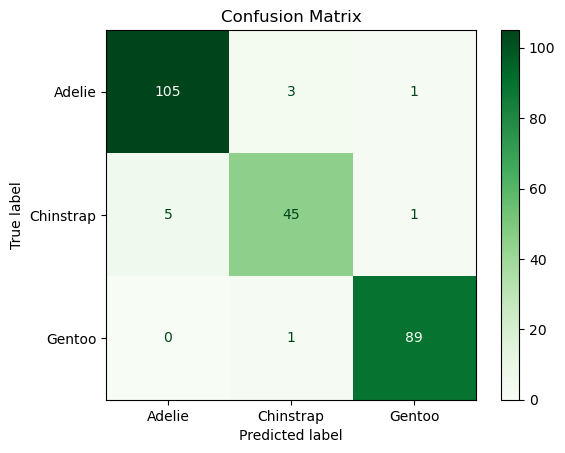

              precision    recall  f1-score   support

      Adelie       0.95      0.96      0.96       109
   Chinstrap       0.92      0.88      0.90        51
      Gentoo       0.98      0.99      0.98        90

    accuracy                           0.96       250
   macro avg       0.95      0.94      0.95       250
weighted avg       0.96      0.96      0.96       250



In [40]:
create_confusion_matrix_and_report(best_model, x_train, y_train)

##### Testing

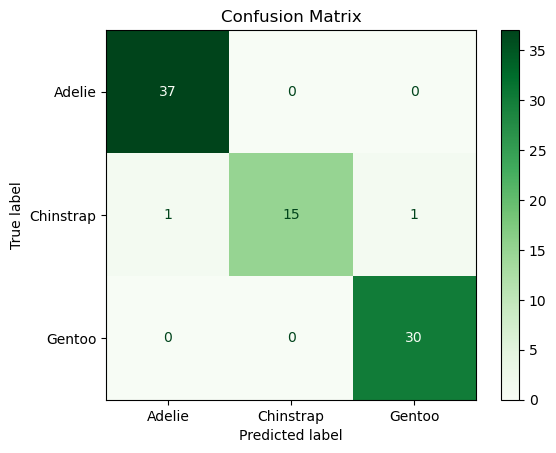

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        37
   Chinstrap       1.00      0.88      0.94        17
      Gentoo       0.97      1.00      0.98        30

    accuracy                           0.98        84
   macro avg       0.98      0.96      0.97        84
weighted avg       0.98      0.98      0.98        84



In [41]:
create_confusion_matrix_and_report(best_model, x_test, y_test)

##### Final Decision Boundary

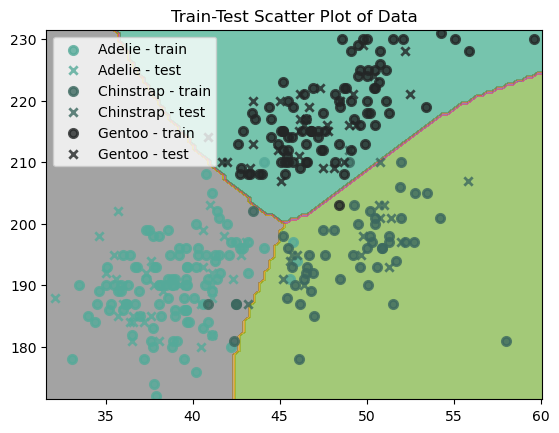

In [42]:
plot_decision_boundary(best_model, x_train, y_train, x_test, y_test, class_mapping.values())

### Insights

     1. As seen on the initial scatter plot of the EDA, it was easy to see how separable the penguin species, Adelie, Chinstrap and Gentoo, just by looking at their flipper and culmen length. This was verified by utilizing the simple SVC classifier with default hyperparameters which was able to attain a very high macro-accuracy rate of 95% an 97& for the training and testing, respectively. Furthermore, considering that the cost for misclassification in this problem is equal for both false positive and false negative, looking at the result of the macro-F1 score for both training and testing, a similar result of 95% was achieved further solidifying the sensitivity and precision of the model. 
     2. Using the three different multi-classification strategy and random search algorithm with only five (5) trials and default 5-fold validation to tune the hyperparameters of the kernel classifier, it was found that OnevsRest SVC Classifier with box-constraint of 91.50, gamma of 0.15 and radial basis function (rbf) kernel was ideal for this classification problem, which was able to lightly increase the macro-accuracy rate of the test data to 98%.  

## Problem 2: Predicting Bike Sharing Demand in Seoul, South Korea

    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
    
    The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 
       
    Citation:
    V E, Sathishkumar (2020), “Seoul Bike Sharing Demand Prediction”, Mendeley Data, V2, doi: 10.17632/zbdtzxcxvg.2
    
    Main Objective:
    Predict Bike Demand using Hour, Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, and Rainfall of data corresponding to Winter Season

### Dataset

#### Import

In [43]:
seoul_bike_data = r"C:\Users\Josh\000 Files\003 Mengg AI\01b 221 (AI)\01 Machine Exercises\02 Kernel Methods\SeoulBikeData.csv"
seoul_bike_df = import_csv_dataset(seoul_bike_data)

In [44]:
# Problem specific instructions:
# Get the data points obtained during the 'Winter' Season
# Drop 'Holiday' and 'Functioning Day' columns
seoul_bike_winter_df = seoul_bike_df[seoul_bike_df['Seasons'] == 'Winter']
seoul_bike_final_df = seoul_bike_winter_df.drop(columns=['Holiday','Functioning Day','Seasons'])

In [45]:
seoul_bike_final_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2155,28/02/2018,19,19,2.5,95,1.9,838,1.7,0.0,0.0,0.0
2156,28/02/2018,8,20,2.7,96,1.5,1479,2.1,0.0,0.0,0.0
2157,28/02/2018,10,21,2.4,95,2.5,1349,1.6,0.0,9.0,0.0
2158,28/02/2018,13,22,2.3,96,1.9,1207,1.7,0.0,0.0,0.0


#### Exploratory Analysis

In [46]:
seoul_bike_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, 0 to 2159
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2160 non-null   object 
 1   Rented Bike Count          2160 non-null   int64  
 2   Hour                       2160 non-null   int64  
 3   Temperature(°C)            2160 non-null   float64
 4   Humidity(%)                2160 non-null   int64  
 5   Wind speed (m/s)           2160 non-null   float64
 6   Visibility (10m)           2160 non-null   int64  
 7   Dew point temperature(°C)  2160 non-null   float64
 8   Solar Radiation (MJ/m2)    2160 non-null   float64
 9   Rainfall(mm)               2160 non-null   float64
 10  Snowfall (cm)              2160 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 202.5+ KB


In [47]:
seoul_bike_final_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
dtype: int64

#### Preparation

In [48]:
# Obtain features data
features_df = seoul_bike_final_df.drop(columns=['Rented Bike Count', 'Date'])

In [49]:
# Obtain target data
target_df = seoul_bike_final_df['Rented Bike Count']

In [50]:
# Transform dataframe into numpy for partitioning
x2 = features_df.to_numpy()
y2 = target_df.to_numpy()

In [52]:
print(x2.shape)
print(y2.shape)

(2160, 9)
(2160,)


#### (a) Visualization

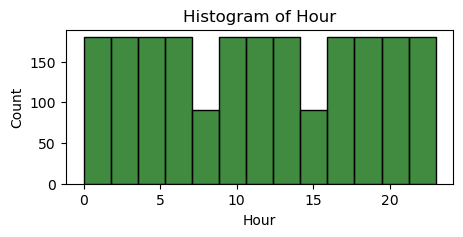

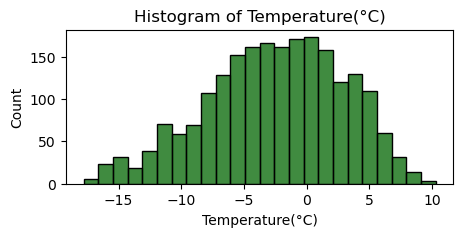

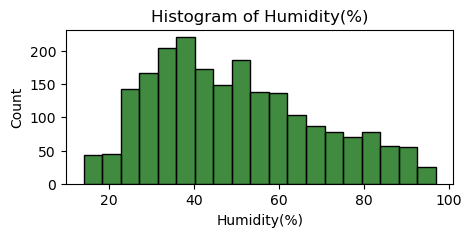

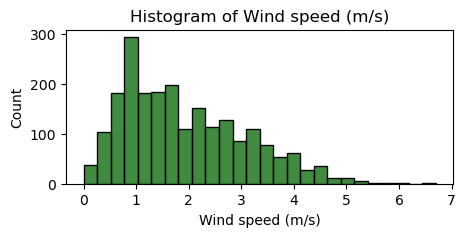

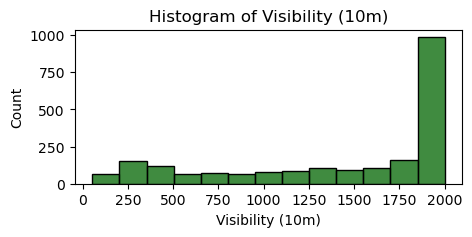

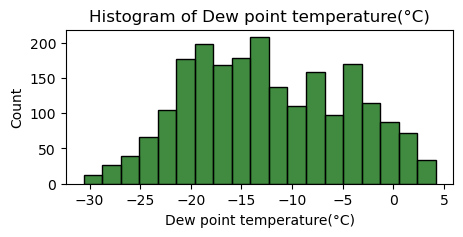

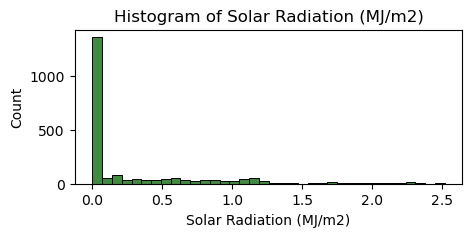

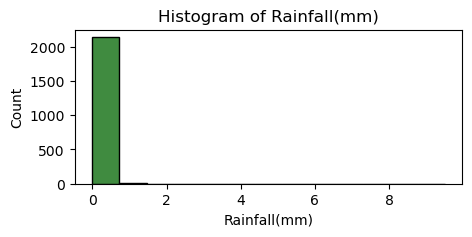

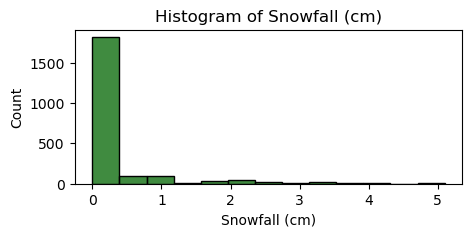

In [53]:
for column in features_df.columns:
    plt.figure(figsize=(5, 2))
    sns.histplot(x=column, data=seoul_bike_final_df, color='darkgreen')
    plt.title(f"Histogram of {column}")
    plt.show()

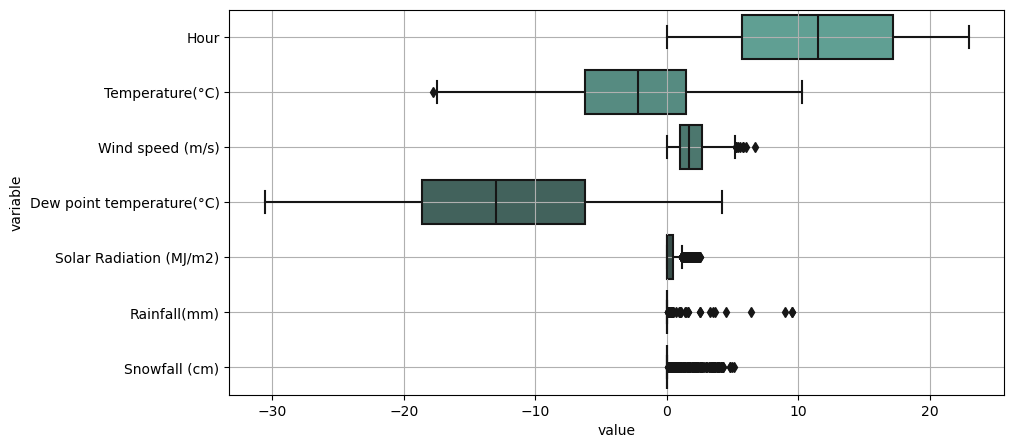

In [54]:
features_df_alpha = features_df.drop(columns=['Visibility (10m)', 'Humidity(%)'])

# Collect all features 
df_melted = features_df_alpha.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(10,5))
sns.boxplot(data=df_melted, width=0.8, orient="h",x="value", y="variable", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

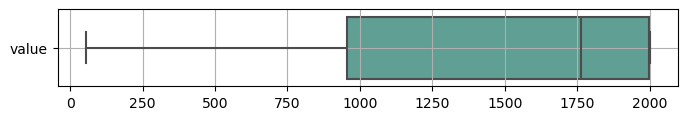

In [55]:
features_df_beta = features_df[['Visibility (10m)']]

# Collect all features 
df_melted = features_df_beta.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(8,1))
sns.boxplot(data=df_melted, width=0.8, orient="h", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

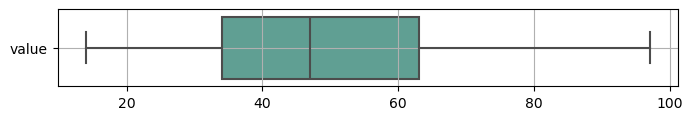

In [56]:
features_df_gamma = features_df[['Humidity(%)']]

# Collect all features 
df_melted = features_df_gamma.melt(var_name='variable', value_name='value')

# Create a combined boxplot using Seaborn
plt.figure(figsize=(8,1))
sns.boxplot(data=df_melted, width=0.8, orient="h", palette = 'dark:#5A9_r')
plt.rc('axes', labelsize=15)
plt.grid()
plt.show()

#### Partition

In [57]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=9811)

### (b) Support Vector Regression Model

In [58]:
def regression_model_optimization (classifier, classifier_name, parameter1, parameter1_scale, max_iter, x, y, x_test, y_test):
    # Parameter Distribution
    param_dist = {
        f'{classifier_name}__{parameter1}': stats.expon(scale=parameter1_scale),
        f'{classifier_name}__gamma': stats.expon(scale=1),
        f'{classifier_name}__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
        }

    # Model Pipeline
    model = make_pipeline(StandardScaler(), classifier())

    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=max_iter, verbose=0)
    start = time()
    
    random_search.fit(x, y)
    print("RandomizedSearchCV took %.2f seconds for %d candidates parameter settings."
            % ((time() - start), max_iter))

    # Best Parameter
    print('Best Parameters:\n', random_search.best_params_)
    
    predictions = random_search.best_estimator_.predict(x_test)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f"RMSE on Test Set: {rmse}")
    
    return random_search.best_estimator_

In [59]:
svr_model = regression_model_optimization (SVR, 'svr', 'epsilon', 0.1, 20, x2_train, y2_train, x2_test, y2_test)

RandomizedSearchCV took 35.64 seconds for 20 candidates parameter settings.
Best Parameters:
 {'svr__epsilon': 0.2578193848443224, 'svr__gamma': 0.24822617382379053, 'svr__kernel': 'linear'}
RMSE on Test Set: 135.5417806621513


In [60]:
def plot_pred_vs_actual(x_train, y_train, x_test, y_test, model, title):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    max_val = max(np.max(y_train_pred), np.max(y_test_pred))
    
    plt.plot(np.array([0, max_val]),np.array([0, max_val]),color='r',label='_nolegend_')
    plt.scatter(y_train, y_train_pred, alpha=0.25, label="Training")
    plt.scatter(y_test, y_test_pred, alpha=0.75, label="Testing")
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Plot of Training and Testing with {title}')
    plt.legend()
    plt.grid()
    plt.show()
    
    print('R-squared on Training Data: %.5f' % model.score(x_train ,y_train))
    print('R-squared on Test Data: %.5f' % model.score(x_test,y_test))

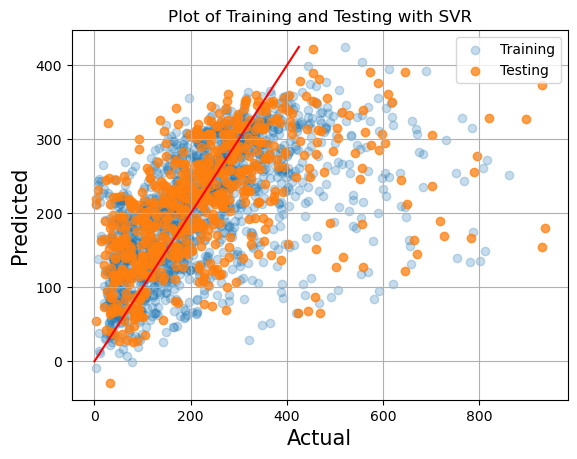

R-squared on Training Data: 0.29029
R-squared on Test Data: 0.25285


In [61]:
plot_pred_vs_actual(x2_train, y2_train, x2_test, y2_test, svr_model, 'SVR')

### (c) Kernel Ridge Regression Model

In [62]:
krr_model = regression_model_optimization (KernelRidge, 'kernelridge', 'alpha', 0.1, 20, x2_train, y2_train, x2_test, y2_test)

RandomizedSearchCV took 21.37 seconds for 20 candidates parameter settings.
Best Parameters:
 {'kernelridge__alpha': 0.08768298903853083, 'kernelridge__gamma': 0.2506748571785482, 'kernelridge__kernel': 'rbf'}
RMSE on Test Set: 106.93214357902589


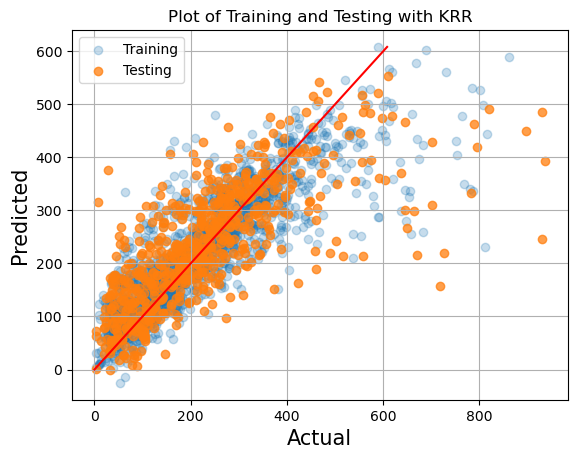

R-squared on Training Data: 0.70406
R-squared on Test Data: 0.53497


In [63]:
plot_pred_vs_actual(x2_train, y2_train, x2_test, y2_test, krr_model, 'KRR')

### (d) Linear Regression Model

In [64]:
linear_regression_model = make_pipeline(StandardScaler(),LinearRegression()).fit(x2_train,y2_train)

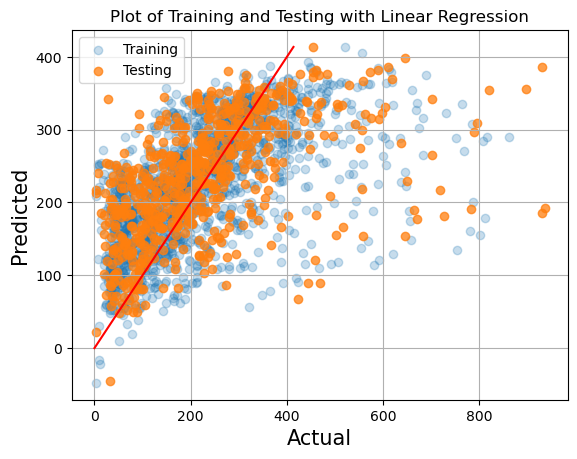

R-squared on Training Data: 0.31682
R-squared on Test Data: 0.28016


In [65]:
plot_pred_vs_actual(x2_train, y2_train, x2_test, y2_test, linear_regression_model, 'Linear Regression')

### Insights